In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

import random

# Loading Dataset

In [ ]:
dataset_cifar = tf.keras.datasets.cifar10.load_data()
(X_train, y_train), (X_test, y_test) = dataset_cifar

# remember to put brackets

# Pre-processing Data

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
#normalization to small range ("-1 to 1" OR "0 to 1") increases model reliability

[]

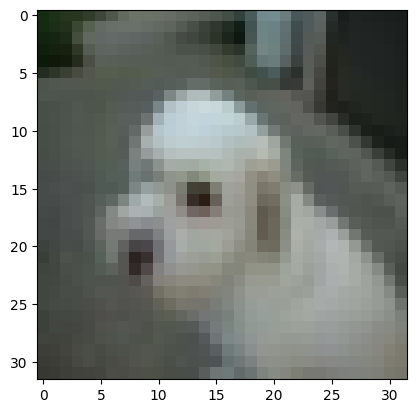

In [ ]:
plt.imshow(random.choice(X_train))
plt.plot()

In [ ]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[:10]

# each tuple [] denotes a number
# eg- first element, is represented by (0,0,0,0,0,0, 1,0,0,0)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

# Defining Network

In [ ]:
model = Sequential([                                        # We define layers, separating each layer using comma
    Input(shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])),    # X_train.shape = (50,000, 32, 32, 3)

    Conv2D(32, kernel_size = (3, 3), activation='relu'),
    MaxPooling2D(pool_size = (2, 2)),                             # first convulational block

    Conv2D(64, kernel_size = (3, 3), activation='relu'),
    MaxPooling2D(pool_size = (2, 2)),

    Conv2D(128, kernel_size = (3, 3), activation='relu'),
    MaxPooling2D(pool_size = (2, 2)),

    Flatten(),                                              # converted from 32x32x3 to 3072x1 (1 dimensional), as dense layers in NNs need 1D stuff
    Dense(128, activation = 'relu'),                        # relu helps catch non-linearity
    Dropout(0.2),                                           # sets random 20% weights to 0, to prevent overfitting
    Dense(64, activation = 'relu'),                         # halving the number of neurons
    Dropout(0.2),
    Dense(10, activation = 'softmax'),                      # converts into set of probabilities
])

# Training Model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# adam is robust
# stochastic gradient descent, loss func for one-hot encoding (diff between predicted probabilities and one-hot encoded labels)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,818 (655.54 KB)

 Trainable params: 167,818 (655.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=11, validation_data=(X_test, y_test))

#epochs is the number of complete iterations on the dataset.

Epoch 1/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 46ms/step - accuracy: 0.3110 - loss: 1.8385 - val_accuracy: 0.5437 - val_loss: 1.2706
Epoch 2/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 44ms/step - accuracy: 0.5447 - loss: 1.2744 - val_accuracy: 0.6068 - val_loss: 1.0999
Epoch 3/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.6244 - loss: 1.0668 - val_accuracy: 0.6501 - val_loss: 1.0015
Epoch 4/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.6742 - loss: 0.9488 - val_accuracy: 0.6788 - val_loss: 0.9258
Epoch 5/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.7083 - loss: 0.8503 - val_accuracy: 0.6885 - val_loss: 0.9075
Epoch 6/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.7292 - loss: 0.7819 - val_accuracy: 0.7069 - val_loss: 0.8664
Epoch 7/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.7433 - loss: 0.7356 - val_accuracy: 0.7159 - val_loss: 0.8367
Epoch 8/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.7683 -

# Plotting Loss and Accuracy

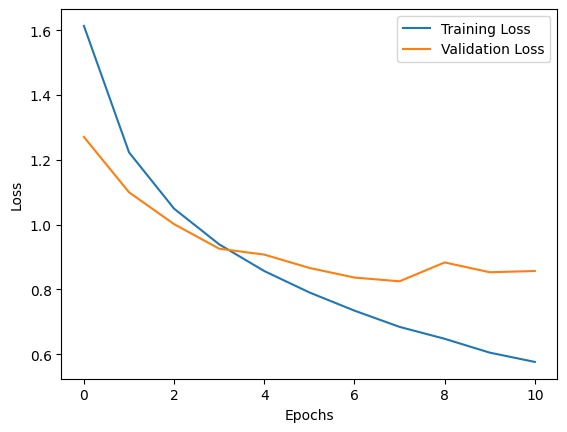

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

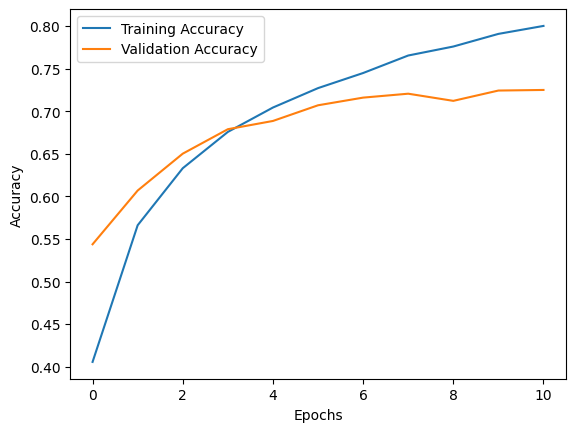

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7305 - loss: 0.8547


In [ ]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


Actual label:- 6
Predicted label:- 6


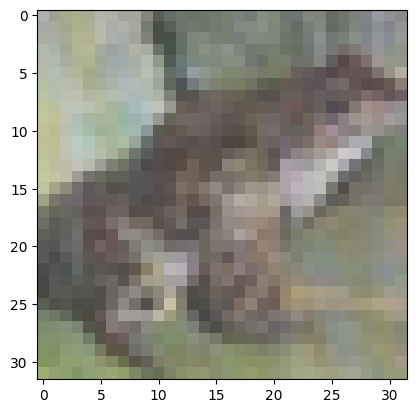

In [ ]:
plt.imshow(X_test[140])

print("Actual label:-", np.argmax(y_test[140]))
print("Predicted label:-", np.argmax(y_pred[140]))

# np.argmax returns highest probability wala

In [ ]:
y_pred

array([[5.2006893e-05, 5.8824895e-07, 7.6433452e-04, ..., 5.0396740e-04,
        3.3800420e-06, 1.0693941e-06],
       [7.8508904e-04, 9.5102245e-05, 1.5385410e-08, ..., 6.8305395e-10,
        9.9910879e-01, 1.0947720e-05],
       [1.5593669e-01, 5.7358339e-02, 1.6255502e-02, ..., 2.6482234e-03,
        5.0076675e-01, 2.5226071e-01],
       ...,
       [3.3138903e-08, 1.2971558e-09, 2.5367516e-04, ..., 1.8610841e-02,
        1.3265672e-10, 5.6475784e-08],
       [5.2626970e-06, 9.9803090e-01, 3.6408749e-04, ..., 1.0332506e-05,
        2.6260339e-05, 6.4537191e-04],
       [1.1517923e-11, 2.6859848e-13, 2.8035777e-07, ..., 9.9789447e-01,
        2.3186677e-17, 1.4671521e-12]], dtype=float32)